In [88]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import pylab as plt

import sim_tools.kernels.center_surround as csgen
import sim_tools.kernels.gabor as gabgen
from spike_tools.vis import my_imshow

def mse(mat0, mat1):
    return ((mat0 - mat1)**2).mean()


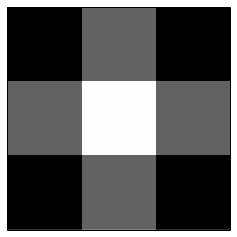

In [91]:
kernel_w = 3
std_dev = 0.8
sd_mult = 6.7
csk = csgen.center_surround_kernel(kernel_w, std_dev, sd_mult)

plt.figure()
ax = plt.subplot(1,1,1)
my_imshow(ax, csk)
plt.show()

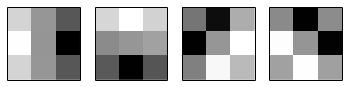

In [94]:
freq = 5.
pi_divs = 7
pi_frac = np.pi/float(pi_divs)
gk = gabgen.multi_gabor(kernel_w, [i*pi_frac for i in range(pi_divs)],
                        std_dev, freq)
cols = 4
rows = len(gk)//cols + 1
plt.figure()
div = 0
for k in gk:
    div += 1
    ax = plt.subplot(rows, cols, div)
    my_imshow(ax, k)#, interpolation='bilinear')
plt.show()